# EN2550: Assignment 03 on Object Counting on a Conveyor Belt

## Connected Component Analysis

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

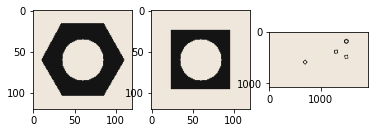

In [2]:
hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

In [3]:
hexnut_template_gray = cv.cvtColor(hexnut_template,cv.COLOR_RGB2GRAY)
squarenut_template_gray = cv.cvtColor(squarenut_template,cv.COLOR_RGB2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100,cv.COLOR_RGB2GRAY)

ret1, hexnut_template_thr = cv.threshold(hexnut_template_gray, 0 , 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret2 ,squarenut_template_thr = cv.threshold(squarenut_template_gray, 0 , 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret3 ,conveyor_f100_thr = cv.threshold(conveyor_f100_gray, 0 , 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

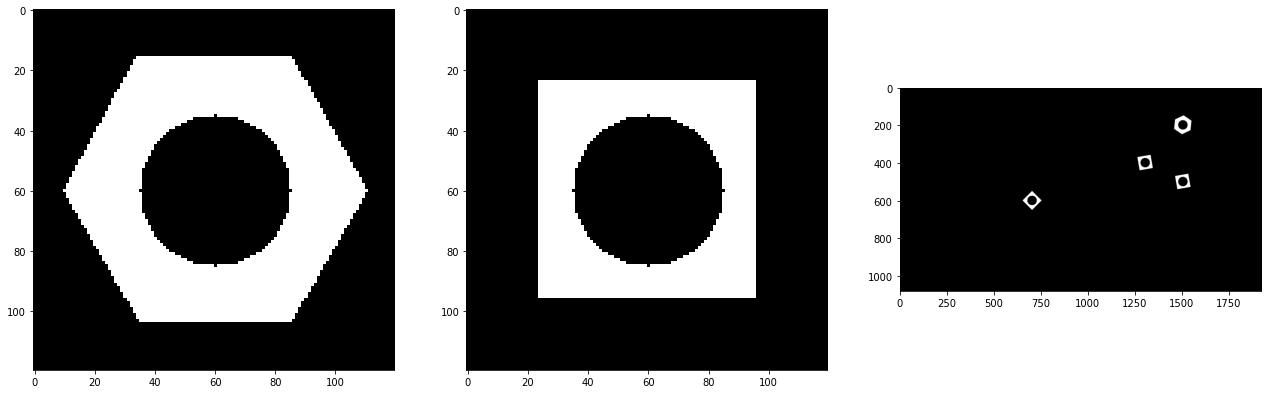

20.0 20.0 20.0


In [4]:
fig, ax = plt. subplots(1,3 , figsize = (22,10))
ax[0].imshow(cv.cvtColor(hexnut_template_thr, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template_thr, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100_thr, cv.COLOR_RGB2BGR))
plt.show()

print(ret1 ,ret2 ,ret3)

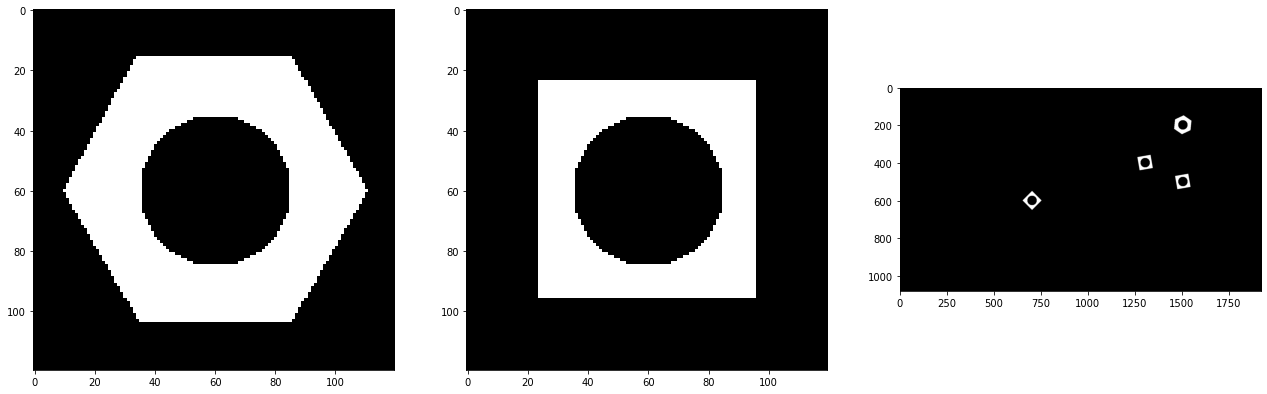

In [5]:
#kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],dtype= np.uint8)
kernel = np.ones((3,3))

hexnut_template_closed = cv.morphologyEx(hexnut_template_thr, cv.MORPH_CLOSE, kernel)
squarenut_template_closed = cv.morphologyEx(squarenut_template_thr, cv.MORPH_CLOSE, kernel)
conveyor_f100_closed = cv.morphologyEx(conveyor_f100_thr, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3 , figsize = (22,10))
ax[0].imshow(cv.cvtColor(hexnut_template_closed, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template_closed, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100_closed, cv.COLOR_RGB2BGR))
plt.show()

In [6]:
def Is_component(image,width,height,area):
    w = width>10 and width<image.shape[0]-10
    h = height>10 and height<image.shape[1]-10
    A = area>100 and area < (image.shape[0]-10)*(image.shape[1]-10)
    if ( w and h and A):
        return True
    return False



def Analayse(img_thrs,img_original, thikness ):
    output = cv.connectedComponentsWithStats(img_thrs , 8, cv.CV_32S )
    (numLabels, labels, stats, centroids) = output

    print("Number of connected components =",numLabels-1)

    item_count = 0

    for i in range (0 , numLabels):
        
        x, y, width, height, area = stats[i]

        if Is_component(img_thrs,width,height,area):
            item_count +=1

            print ("Item No :", item_count)
            print ("Area Is =" , area)
            print("Centroid is = ", int(centroids[i][0] + 0.5), int(centroids[i][1] + 0.5))
            print ("\n")
            
            image = cv.rectangle(img_original, (x, y), (x+width, y+height), (0, 255, 0), thikness)
            cv.putText(img_original, str(item_count), (x, y-2), cv.FONT_HERSHEY_SIMPLEX, image.shape[0]/500, (255, 0, 255), 1, cv.LINE_AA)

    return(img_original)

1. **Stats :**
Statistic details about the bounding box of each components in the given binary image. this includes ,
* Startin leftmost corner (x value) which is the inclusive start of the bounding box in the horizontal direction.
* Starting Top Corner (y value) which is the inclusive start of the bounding box in the vertical direction.
* Width of the bounding box
* Height of the bounding box
* Area (in pixel) of the connected component

2. **Centroids :** (x,y) cordinates of the centroids of each connected component. (cetroid of Area) 

##### Analysis of Hex Nut Image

*Note that In the following parts, the background will not be considered as a component*

Number of connected components = 1
Item No : 1
Area Is = 4728
Centroid is =  60 59




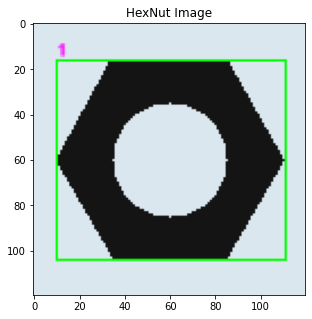

In [7]:
result =Analayse(hexnut_template_closed, hexnut_template.copy(),1)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(result, cmap='gray')
ax.set_title("HexNut Image")
plt.show()

##### Analysis of Sqrt Image

Number of connected components = 1
Item No : 1
Area Is = 3227
Centroid is =  59 59




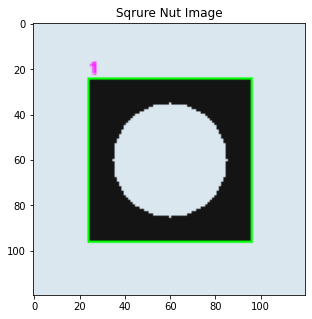

In [8]:
result = Analayse(squarenut_template_closed , squarenut_template.copy() , 1)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(result, cmap='gray')
ax.set_title("Sqrure Nut Image")
plt.show()


##### Analaysis of convoyer Image

Number of connected components = 4
Item No : 1
Area Is = 4636
Centroid is =  1499 199


Item No : 2
Area Is = 3087
Centroid is =  1299 399


Item No : 3
Area Is = 3087
Centroid is =  1499 499


Item No : 4
Area Is = 3144
Centroid is =  700 600




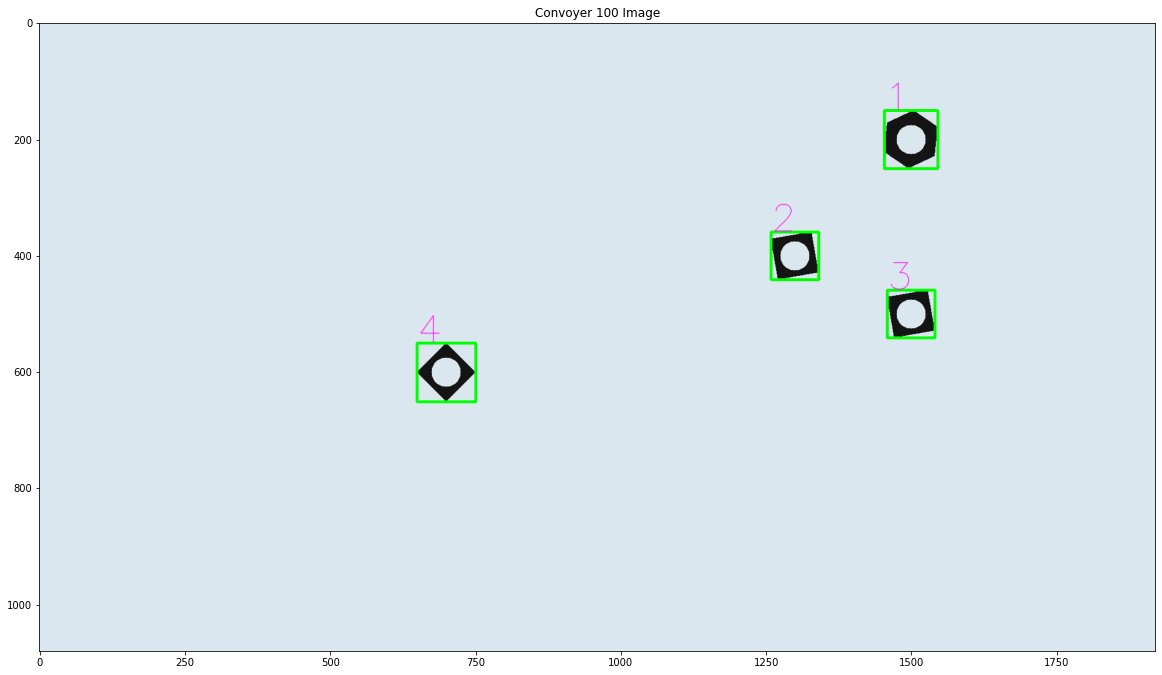

In [9]:
result = Analayse(conveyor_f100_closed , conveyor_f100.copy() , 3)

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(result, cmap='gray')
ax.set_title("Convoyer 100 Image")
plt.show()

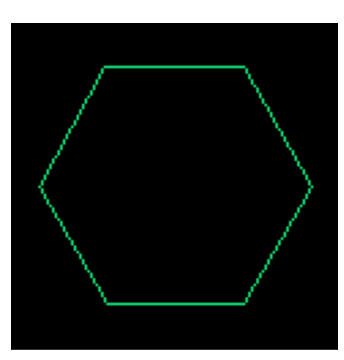

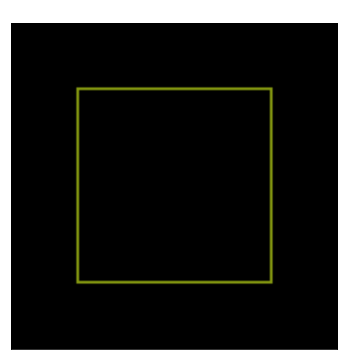

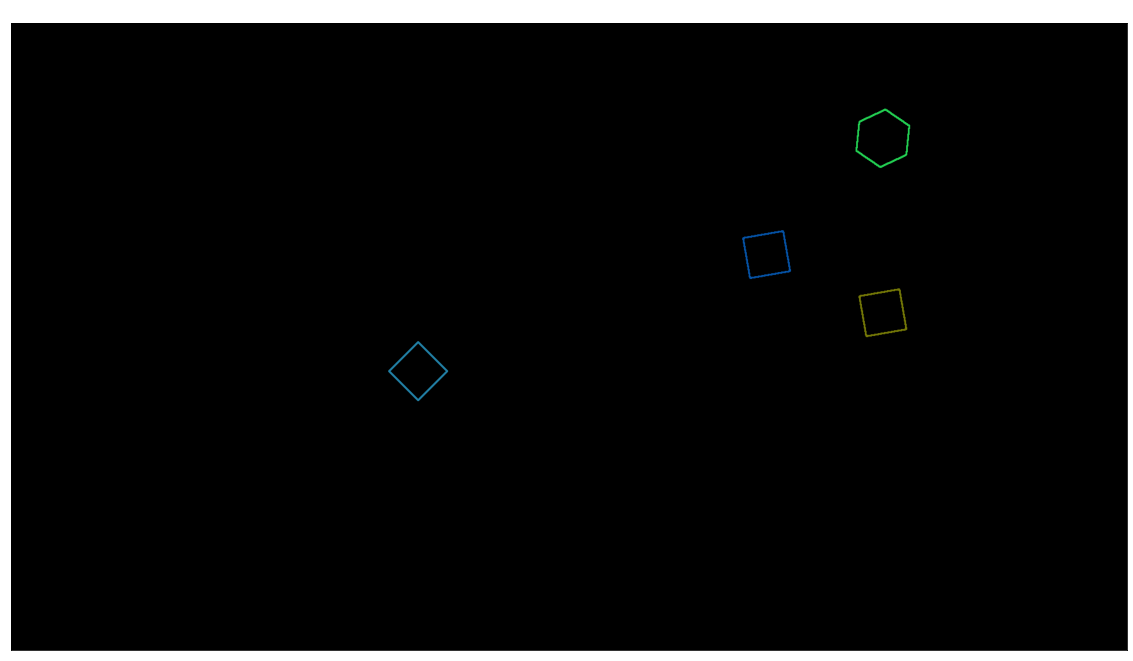

In [10]:
def ContureAnalyse(img , line_thikness):
    
    contours, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    decoy_img = np.zeros((img.shape[0],img.shape[1],3), dtype=np.uint8)

    for i in contours:
        R,G,B=np.random.randint(0, 255, 3, dtype=np.uint8)
        cv.drawContours(decoy_img,[i],0, (int(R),int(G),int(B)), line_thikness)  
    return(decoy_img)


Hex_img = ContureAnalyse(hexnut_template_closed , 1)
Sqrt_img = ContureAnalyse(squarenut_template_closed , 1)
Conv_img = ContureAnalyse(conveyor_f100_closed,2)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(Hex_img)
ax.set_title("Contures of HexNut", color='white')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(Sqrt_img)
ax.set_title("Contures of Sqrt Nut", color='white')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(Conv_img)
ax.set_title("Contures of Convoy", color='white')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## Detecting Objects on a Synthetic Conveyor

In [11]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [12]:
# function for counting nuts in a frame
def count_nuts(HexNut_contures, SqrNut_contures, conveyor_frame):
    HexNuts = 0    # no. of hexa nuts
    sqrNuts = 0     # no. of square nuts

    # contours of the conveyor frame
    for f in conveyor_frame:
        # match contours with hexa nuts
        match = cv.matchShapes(HexNut_contures[0], f, 1, 0.0)
        if match<0.02:
            HexNuts +=1
        # match contours with square nuts
        match = cv.matchShapes(SqrNut_contures[0], f, 1, 0.0)
        if match<0.02:
            sqrNuts +=1
    return HexNuts, sqrNuts

    

In [13]:
# get the frames in the video
def get_frames(frames_array):
    cap = cv.VideoCapture('conveyor.mp4')
    while cap.isOpened():                                    
        ret, frame = cap.read()
        if not ret:
            break
        frames_array.append(np.array(frame))
    cap.release()

# get binary images and Do the morphology
def Binary_image(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)   # grayscale image
    thresh, image = cv.threshold(image, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)    # thresholding
    
    kernel = np.ones((3, 3), np.uint8)
    image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)   # morphology
    return image

In [14]:
def Analyse_contures(img):
    contours, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    Area = 0
    for c in contours:
        Area += cv.contourArea(c)
    return (contours , Area)


hexnut_contures, hexnut_area    = Analyse_contures(hexnut_template_closed)
SqrNut_contures , squarenut_area = Analyse_contures(squarenut_template_closed)

Writing the vedio

In [15]:
# Writing the video
frame_array = []
shape = (1080, 1920, 3)

# Your code here

get_frames(frame_array) # get the all frames in the video
f=0     # frame number
pre_area = 0    # store previous area
Tot_Hex_nuts, Tot_sqr_nuts = 0, 0    # total nuts in the video
pre_Hex_nuts, pre_Sqr_nuts = 0, 0        # store nuts in previous frames

for i in range(len(frame_array)):
    frame = frame_array[i]  # current frame
    f+=1        # frame number
    frame_bin = Binary_image(frame)         # convert the frame to a binary image

    contours_frame, con_area = Analyse_contures(frame_bin)       # get the contours and contour area of the frame

    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)    # color converting
    
    R,G,B= 255,0,220               #  color purple
    cv.drawContours(frame, contours_frame, -1, (int(R),int(G),int(B)), 2)      # draw contours
    
    hex_nuts, square_nuts = count_nuts(hexnut_contures, SqrNut_contures, contours_frame)     # count of nuts in the current frame
 
    text = "Frame :" + str(f) + "     " + str(con_area) + "   " + str(pre_area)        # texts on frames [ frame number]
    cv.putText(frame, text, (100, 50), cv.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 1, cv.LINE_AA)
    
    text = 'current frame : hex nuts = {}   square nuts = {}'.format(hex_nuts, square_nuts)       # analyse nuts in the current frame
    cv.putText(frame, text, (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 1, cv.LINE_AA)

    # count the total nuts in the video
    # nuts appear
    if pre_Hex_nuts<hex_nuts or pre_Sqr_nuts<square_nuts:
        # two nuts appear in the same time
        if (con_area-pre_area)>(hexnut_area+squarenut_area-2000):
            Tot_Hex_nuts +=1
            Tot_sqr_nuts += 1
            pre_area = con_area
            pre_Hex_nuts, pre_Sqr_nuts = hex_nuts, square_nuts
        else:
            # hexa nut appears
            if (con_area-pre_area)>(squarenut_area+500):
                Tot_Hex_nuts += 1
                pre_area = con_area
                pre_Hex_nuts = hex_nuts
            # square nut appears
            elif (con_area-pre_area)>(squarenut_area-1000):
                Tot_sqr_nuts += 1
                pre_area = con_area
                pre_Sqr_nuts = square_nuts

    # nuts disappear
    if pre_Hex_nuts>hex_nuts or pre_Sqr_nuts>square_nuts:
        if (pre_area-con_area)>(squarenut_area-1500):
            pre_area = con_area 
            pre_Hex_nuts, pre_Sqr_nuts = hex_nuts, square_nuts

    # total nuts in the video
    text = 'total : hex nuts = {}   square nuts = {}'.format(Tot_Hex_nuts, Tot_sqr_nuts)
    cv.putText(frame, text, (100, 150), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv.LINE_AA)
    frame_array[i] = frame

# write the video
out = cv.VideoWriter('./Conveyor_Result_180601T.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))

# play the video
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(10) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()